--- ERGEBNISSE DES INFLATIONS-SIMULATORS ---
Laufzeit: 30 Jahre
Nominale Rendite: 5.00% p.a. | Inflation: 2.00% p.a.
--------------------------------------------------
Total eingezahlt:                  150,000.00 CHF
Endkapital (Nominal):              332,194.24 CHF
Endkapital (Reale Kaufkraft):      183,394.77 CHF
--------------------------------------------------
Nominaler Gewinn:                  182,194.24 CHF
Realer Gewinn (in Kaufkraft):       33,394.77 CHF


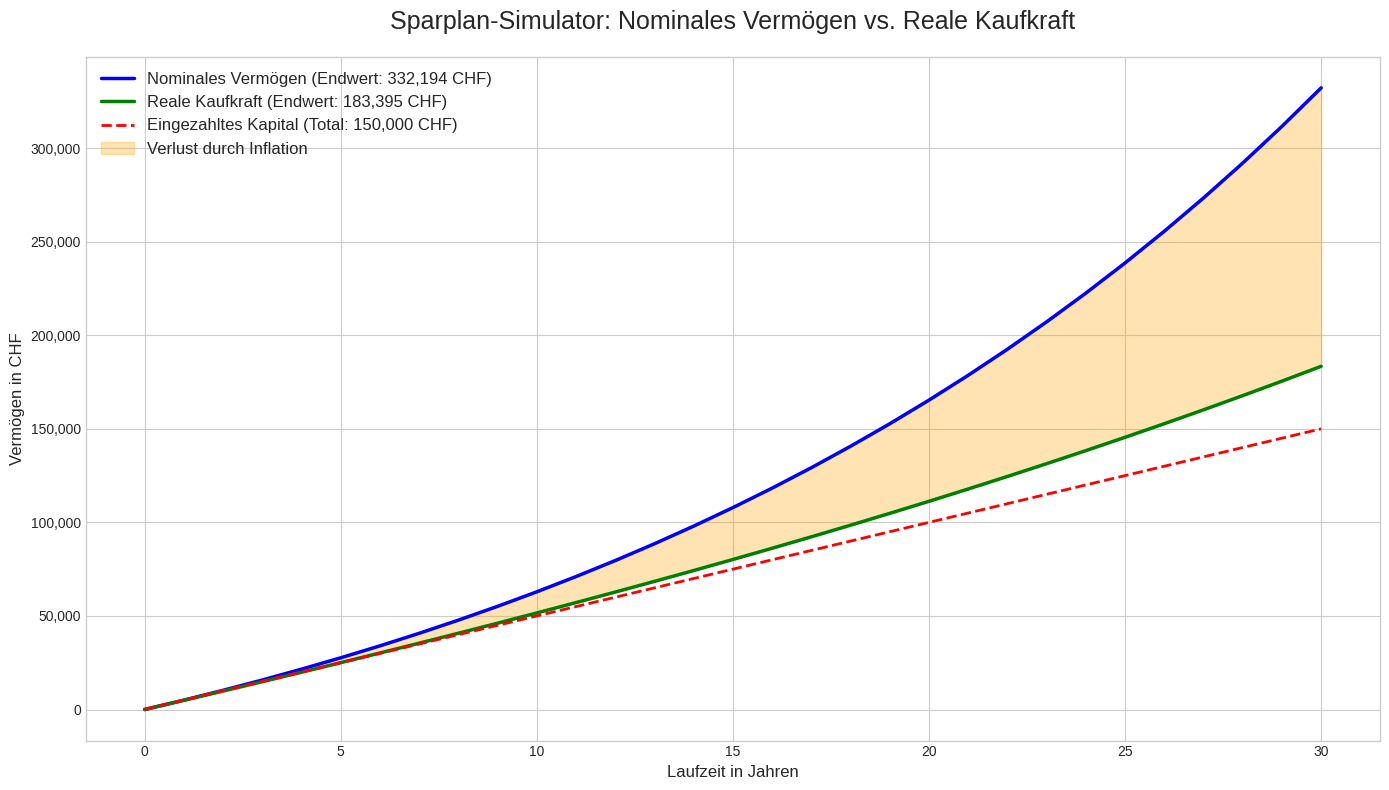



--- TABELLARISCHE ENTWICKLUNG (AUSZUG) ---
 Jahr  Eingezahlt  Nominales Vermögen  Reales Vermögen
    0           0                0.00             0.00
    1        5000             5000.00          4901.96
    2       10000            10250.00          9851.98
    3       15000            15762.50         14853.36
    4       20000            21550.62         19909.45
   10       50000            62889.46         51591.26
   15       75000           107892.82         80165.95
   20      100000           165329.77        111262.20
   25      125000           238635.49        145455.70
   26      130000           255567.27        152721.71
   27      135000           273345.63        160142.83
   28      140000           292012.91        167724.79
   29      145000           311613.56        175473.43
   30      150000           332194.24        183394.77


In [1]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

jaehrliche_einzahlung = 5000     # Jährliche Einzahlung in CHF
nominaler_zinssatz_prozent = 5.0 # Erwartete Rendite pro Jahr
inflationsrate_prozent = 2.0     # Angenommene jährliche Inflationsrate (in % direkt!)
laufzeit_jahre = 30              # Laufzeit des Sparplans in Jahren

# Umwandlung der Prozentsätze in Faktoren für die Berechnung
nominaler_zinsfaktor = 1 + (nominaler_zinssatz_prozent / 100)
inflationsfaktor = 1 + (inflationsrate_prozent / 100)

# Erstellen einer Liste der Jahre von 0 bis zur vollen Laufzeit
jahre = np.arange(0, laufzeit_jahre + 1)

# Initialisieren von Listen zur Speicherung des Vermögensverlaufs
vermoegen_nominal = [0] * (laufzeit_jahre + 1)
vermoegen_real = [0] * (laufzeit_jahre + 1)
eingezahltes_kapital_verlauf = [0] * (laufzeit_jahre + 1)

for i in range(1, laufzeit_jahre + 1):
    # Standard-Zinseszinsrechnung mit jährlicher Einzahlung
    # Kapitel von Vorjahr verzinsen, Einzahlung addieren
    vermoegen_nominal[i] = vermoegen_nominal[i-1] * nominaler_zinsfaktor + jaehrliche_einzahlung

    # Wert in der heutigen Kaufkraft berechnen
    # Zukünftiges Vermögen abdiskontieren
    vermoegen_real[i] = vermoegen_nominal[i] / (inflationsfaktor ** i)

    # Dies dient als Referenzlinie in der Grafik.
    eingezahltes_kapital_verlauf[i] = jaehrliche_einzahlung * i

# Daten für Ausgabe und Visualisierung
endkapital_nominal = vermoegen_nominal[-1]
endkapital_real = vermoegen_real[-1]
total_eingezahlt = jaehrliche_einzahlung * laufzeit_jahre
nominaler_gewinn = endkapital_nominal - total_eingezahlt
realer_gewinn = endkapital_real - total_eingezahlt

print("--- ERGEBNISSE DES INFLATIONS-SIMULATORS ---")
print(f"Laufzeit: {laufzeit_jahre} Jahre")
print(f"Nominale Rendite: {nominaler_zinssatz_prozent:.2f}% p.a. | Inflation: {inflationsrate_prozent:.2f}% p.a.")
print("-" * 50)
print(f"Total eingezahlt:             {total_eingezahlt:15,.2f} CHF")
print(f"Endkapital (Nominal):         {endkapital_nominal:15,.2f} CHF")
print(f"Endkapital (Reale Kaufkraft): {endkapital_real:15,.2f} CHF")
print("-" * 50)
print(f"Nominaler Gewinn:             {nominaler_gewinn:15,.2f} CHF")
print(f"Realer Gewinn (in Kaufkraft): {realer_gewinn:15,.2f} CHF")

# Die Grafik zeigt den Unterschied zwischen Nominalwert und Kaufkraft.
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

# Zeichnen der drei Kurven
ax.plot(jahre, vermoegen_nominal, marker='', linestyle='-', linewidth=2.5, color='blue', label=f'Nominales Vermögen (Endwert: {endkapital_nominal:,.0f} CHF)')
ax.plot(jahre, vermoegen_real, marker='', linestyle='-', linewidth=2.5, color='green', label=f'Reale Kaufkraft (Endwert: {endkapital_real:,.0f} CHF)')
ax.plot(jahre, eingezahltes_kapital_verlauf, marker='', linestyle='--', linewidth=2, color='red', label=f'Eingezahltes Kapital (Total: {total_eingezahlt:,.0f} CHF)')

# Füllen des Bereichs, der den Inflationsverlust darstellt
ax.fill_between(jahre, vermoegen_nominal, vermoegen_real, color='orange', alpha=0.3, label='Verlust durch Inflation')

# Titel und Achsenbeschriftungen
ax.set_title('Sparplan-Simulator: Nominales Vermögen vs. Reale Kaufkraft', fontsize=18, pad=20)
ax.set_xlabel('Laufzeit in Jahren', fontsize=12)
ax.set_ylabel('Vermögen in CHF', fontsize=12)

# Formatierung der Y-Achse
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Legende und Layout
ax.legend(fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()

# =============== Schritt 7: Detaillierte Tabelle (Bonus) ===============
df = pd.DataFrame({
    'Jahr': jahre,
    'Eingezahlt': eingezahltes_kapital_verlauf,
    'Nominales Vermögen': vermoegen_nominal,
    'Reales Vermögen': vermoegen_real
})
# Runden der Werte für eine saubere Anzeige
df = df.round(2)
print("\n\n--- TABELLARISCHE ENTWICKLUNG (AUSZUG) ---")
# Zeige die ersten 5, die letzten 5 und einige mittlere Zeilen an
print(pd.concat([df.head(), df.iloc[[10, 15, 20, 25]], df.tail()]).to_string(index=False))